# **GENERADOR DE LETRAS DE CANCIONES EN ESPAÑOL E INGLÉS**
## **PROYECTO FINAL DE MÉTODOS DE COMPUTACIÓN INTENSIVA**
### **UNIVERSIDAD NACIONAL DE COLOMBIA**

##### **PRESENTADO POR:**
*Erika Johanna Martínez Salinas*

*Andrea Catalina García Montoya*

# **Análisis exploratorio de datos**

Este notebook contiene el análisis exploratorio de los datos recopilados, la base de datos contiene letras de canciones en español e inglés con diferentes artistas:

Realizarémos una limpieza de los datos con las técnicas vistas en clase, un análisis de sentimientos y un estudio descriptivo.

# Análisis exploratorio de datos (EDA)
En esta sección, exploraremos el conjunto de datos que utilizamos para entender su contenido en términos de temáticas y características de aparición de las palabras y contenidos.


## Recopilación de datos
Los datos los alistamos nosotras por medio de la siguiente página: (https://www.kaggle.com/) donde encontramos un conjunto de datos de letras de canciones descargadas de spotify, las letras están en inglés.

Para la generación de letras en español, se entrenó un conjunto de datos personalizado utilizando GPT-2 y un optimizador AdamW, ambos importados de `Hugging Face`.



## Carga de librerías

In [4]:
# Librerías

import pandas as pd
import matplotlib.pyplot as plt

# Carga canciones en inglés

Cargamos la base de datos que se encuentra en el repositorio GitHub, contiene 4 columnas y 57.650 filas y contiene canciones en inglés

In [ ]:
url = 'https://github.com/CatalinaGMR/ProyectoGeneradordeTexto/raw/main/spotify_millsongdata.csv.zip'
# Load letas dataset
letras_df = pd.read_csv(url)
print(letras_df.shape)

(57650, 4)


# Carga canciones en español

In [9]:
url_esp = 'https://github.com/Erika316/GeneradorCancionesNPL/raw/main/hhgroups_merge_28_05.csv.zip'
# Load letas dataset
letras_esp_df = pd.read_csv(url_esp)
print(letras_esp_df.shape)

(9325, 7)


## Descripción conjunto de datos
A continuación presentamos un resumen estadístico del conjunto de datos en inglés.

In [ ]:
letras_df.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


El conjunto posee las letras de diferentes artistas, por ejemplo N SYNC, ABBA, ACE OF BASE, ADELE, entre otros, a continuación presentamos la agrupación por autor y su resumen.

In [ ]:
# Groupby by author
authors = letras_df.groupby("artist")

# Summary statistic of all authors in corpus
authors.describe().head()

song                                        link         \
             count unique                       top freq count unique   
artist                                                                  
'n Sync         93     93           Best Of My Life    1    93     93   
ABBA           113    113     Ahe's My Kind Of Girl    1   113    113   
Ace Of Base     74     74  Always Have, Always Will    1    74     74   
Adam Sandler    70     70              Camp Granada    1    70     70   
Adele           54     54                 All I Ask    1    54     54   

                                                                      text  \
                                                            top freq count   
artist                                                                       
'n Sync                 /n/n+sync/best+of+my+life_20097419.html    1    93   
ABBA                 /a/abba/ahes+my+kind+of+girl_20598417.html    1   113   
Ace Of Base   /a/ace+of+base/always+have+always+will_2000356...    1    74   
Adam Sandler         /a/adam+sandler/camp+granada_20644961.html    1    70   
Adele                          /a/adele/all+i+ask_21105101.html    1    54   

                                                                             
             unique                                                top freq  
artist                                                                       
'n Sync          93  Girl don't say that it's over  \r\n'Cause you ...    1  
ABBA            113  Look at her face, it's a wonderful face  \r\nA...    1  
Ace Of Base      74  Always have, always will  \r\nI was mesmerized...    1  
Adam Sandler     70  Hello mudda, hello fadda  \r\nHere I am at cam...    1  
Adele            54  [Verse 1]  \r\nI will leave my heart at the do...    1

La cantidad de letras de canciones por artista es bastante similar en el top 10, sin embargo, el dataset contiene en su mayorìa letras de canciones de Donna Summer y de Bob Dylan.

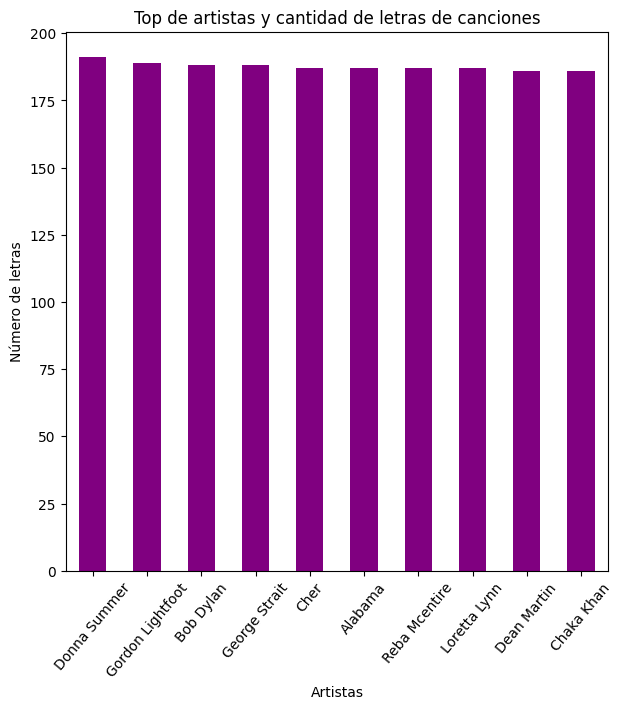

In [ ]:
plt.figure(figsize=(7, 7))

authors.size().sort_values(ascending=False).iloc[0:10].plot.bar(color='purple')  # Especifica el color morado
plt.xticks(rotation=50)
plt.xlabel("Artistas")
plt.ylabel("Número de letras")
plt.title("Top de artistas y cantidad de letras de canciones")
plt.show()

A continuación presentamos un resumen estadístico del conjunto de datos en español.

In [10]:
letras_esp_df.describe()

,id,anyo,visitas
count,9325.000000,9325.000000,9325.000000
mean,26.959786,1914.003110,4230.948311
std,15.873197,433.946845,8625.661313
min,0.000000,0.000000,35.000000
25%,13.000000,2009.000000,823.000000
50%,27.000000,2012.000000,1875.000000
75%,41.000000,2016.000000,4220.000000
max,54.000000,2019.000000,190535.000000


In [11]:
letras_esp_df.head()

,id,artista,cancion,album,letra,anyo,visitas
0,0,Denom,Machete (con Jarfaiter y Gente jodida),Medicina,"Para su nuevo disco ""Medicina"", Denom ha vuelt...",2019,126
1,1,Denom,Vacío (con Ivo Incuerdo),Medicina,"[Denom]\nYo que quería, yo que pedía vida,\nSe...",2019,361
2,2,Denom,El orgullo es fiel (con Juancho Marqués y Elio...,Medicina,"""El orgullo es fiel"" es uno de los cortes incl...",2019,262
3,3,Denom,Mueve mueve (con Fernandocosta),Medicina,"[Estribillo: Denom] (x2)\nMueve, mueve, mueve,...",2019,578
4,4,Jaro Desperdizio,Insomnia,"Sin álbum, es un vídeo suelto","[Estribillo]\nY en esta noche, ¿Quién me arrop...",2019,219


In [15]:
# Groupby by author
artista = letras_esp_df.groupby("artista")

# Summary statistic of all authors in corpus
artista.describe().head()

id                                                  anyo  \
                  count  mean       std   min    25%   50%    75%   max count   
artista                                                                         
2 karas             1.0  31.0       NaN  31.0  31.00  31.0  31.00  31.0   1.0   
3coma14             1.0  49.0       NaN  49.0  49.00  49.0  49.00  49.0   1.0   
4 suyos             1.0  41.0       NaN  41.0  41.00  41.0  41.00  41.0   1.0   
5mentarios          1.0  44.0       NaN  44.0  44.00  44.0  44.00  44.0   1.0   
7 Notas 7 Colores   2.0  18.5  0.707107  18.0  18.25  18.5  18.75  19.0   2.0   

                           ...                  visitas                      \
                     mean  ...      75%     max   count    mean         std   
artista                    ...                                                
2 karas            2007.0  ...  2007.00  2007.0     1.0  1740.0         NaN   
3coma14            2009.0  ...  2009.00  2009.0     1.0  2246.0         NaN   
4 suyos            2007.0  ...  2007.00  2007.0     1.0  1189.0         NaN   
5mentarios         2009.0  ...  2009.00  2009.0     1.0  1707.0         NaN   
7 Notas 7 Colores  1998.5  ...  1999.25  2000.0     2.0  4906.5  973.686038   

                                                             
                      min      25%     50%      75%     max  
artista                                                      
2 karas            1740.0  1740.00  1740.0  1740.00  1740.0  
3coma14            2246.0  2246.00  2246.0  2246.00  2246.0  
4 suyos            1189.0  1189.00  1189.0  1189.00  1189.0  
5mentarios         1707.0  1707.00  1707.0  1707.00  1707.0  
7 Notas 7 Colores  4218.0  4562.25  4906.5  5250.75  5595.0  

[5 rows x 24 columns]

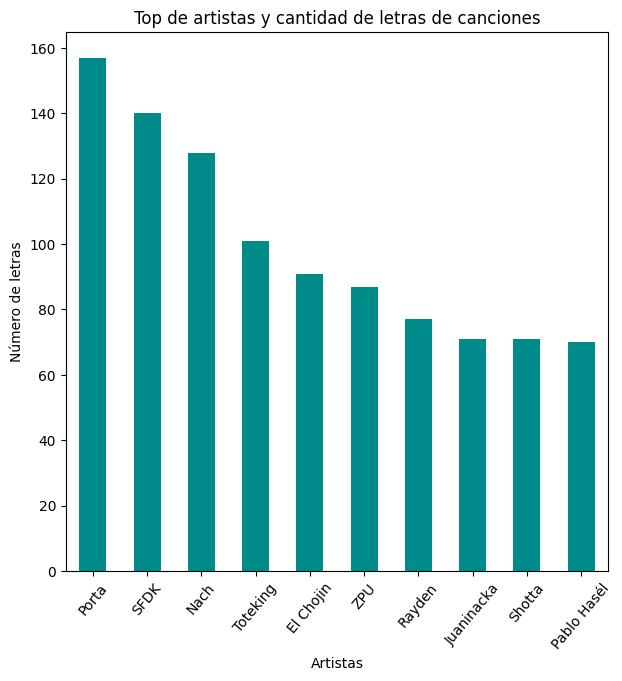

In [17]:
plt.figure(figsize=(7, 7))

artista.size().sort_values(ascending=False).iloc[0:10].plot.bar(color='darkcyan')  # Especifica el color morado
plt.xticks(rotation=50)
plt.xlabel("Artistas")
plt.ylabel("Número de letras")
plt.title("Top de artistas y cantidad de letras de canciones")
plt.show()

# Procesamiento de datos
Antes de continuar con la tarea de exploración, necesitamos trabajar un poco en los datos brutos con los que estamos tratando. Debemos realizar una limpieza de la información desarrollando un NLP como los que desarrollamos en el curso, por ejemplo, el conjunto de datos puede contener caracteres o valores especiales que deben ser removidos.

En este apartado realizamos una tarea típica de preprocesamiento y limpieza que nos permite continuar con EDA!

## Importar librerías

Primero, necesitamos importar todas las bibliotecas implicadas en esta tarea de preprocesamiento.

Importamos el paquete nltk para realizar tareas de PNL. Observe que descargamos los paquetes más populares dentro de él. Es necesario para eliminar la palabra vacía. También descargamos el Tokenizer, el Lemmatizer y el Stemmer.

In [18]:
import string

import nltk
nltk.download("popular")

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Lo primero que debemos eliminar del texto son los caracteres de la línea final. Observe a continuación que podemos ver: \n\r. Necesitamos eliminarlo porque no nos proporcionan información útil.

Una forma sencilla de hacerlo es reemplazar todo este tipo de caracteres con un espacio vacío. Este reemplazo no es un problema, porque luego limpiaremos todos los caracteres extra, espacios incluidos.

In [ ]:
letras_df.text

0        Look at her face, it's a wonderful face  \r\nA...
1        Take it easy with me, please  \r\nTouch me gen...
2        I'll never know why I had to go  \r\nWhy I had...
3        Making somebody happy is a question of give an...
4        Making somebody happy is a question of give an...
                               ...                        
57645    Irie days come on play  \r\nLet the angels fly...
57646    Power to the workers  \r\nMore power  \r\nPowe...
57647    all you need  \r\nis something i'll believe  \...
57648    northern star  \r\nam i frightened  \r\nwhere ...
57649    come in  \r\nmake yourself at home  \r\ni'm a ...
Name: text, Length: 57650, dtype: object

In [ ]:
# Primero removemos \n del texto de la base
letras_df.text = letras_df.text.str.replace('\n',' ')
letras_df.text

0        Look at her face, it's a wonderful face  \r An...
1        Take it easy with me, please  \r Touch me gent...
2        I'll never know why I had to go  \r Why I had ...
3        Making somebody happy is a question of give an...
4        Making somebody happy is a question of give an...
                               ...                        
57645    Irie days come on play  \r Let the angels fly ...
57646    Power to the workers  \r More power  \r Power ...
57647    all you need  \r is something i'll believe  \r...
57648    northern star  \r am i frightened  \r where ca...
57649    come in  \r make yourself at home  \r i'm a bi...
Name: text, Length: 57650, dtype: object

In [ ]:
# Luego vamos a remover \r
letras_df.text = letras_df.text.str.replace('\r',' ')
# Reemplazamos con un espacio bc de esta manera no unimos palabras
letras_df.text

0        Look at her face, it's a wonderful face    And...
1        Take it easy with me, please    Touch me gentl...
2        I'll never know why I had to go    Why I had t...
3        Making somebody happy is a question of give an...
4        Making somebody happy is a question of give an...
                               ...                        
57645    Irie days come on play    Let the angels fly l...
57646    Power to the workers    More power    Power to...
57647    all you need    is something i'll believe    f...
57648    northern star    am i frightened    where can ...
57649    come in    make yourself at home    i'm a bit ...
Name: text, Length: 57650, dtype: object

Una vez que nos hemos ocupado de los caracteres especiales añadidos en las letras de canciones, tenemos un conjunto de documentos formado únicamente por palabras.

En este punto procedemos a limpiar el texto para eliminar signos de puntuación, caracteres especiales y finalmente obtener un conjunto de minúsculas tokenizadas. En el resultado a continuación, podemos ver el conjunto de tokens obtenido con las palabras de cada letra.

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
letras_df['text'] = letras_df['text'].apply(lambda x: tokenizer.tokenize(str(x).lower()))

letras_df.text

0        [look, at, her, face, it, s, a, wonderful, fac...
1        [take, it, easy, with, me, please, touch, me, ...
2        [i, ll, never, know, why, i, had, to, go, why,...
3        [making, somebody, happy, is, a, question, of,...
4        [making, somebody, happy, is, a, question, of,...
                               ...                        
57645    [irie, days, come, on, play, let, the, angels,...
57646    [power, to, the, workers, more, power, power, ...
57647    [all, you, need, is, something, i, ll, believe...
57648    [northern, star, am, i, frightened, where, can...
57649    [come, in, make, yourself, at, home, i, m, a, ...
Name: text, Length: 57650, dtype: object

Además, eliminamos las palabras vacías de cada letra. Estas *palabras vacías* son vocabulario muy utilizado que no aportan información sustancial (pronombres, determinantes, etc). En este caso, tenemos vocabulario en inglés, por lo que necesitamos usar una lista de palabras vacías en inglés. Este conjunto también lo proporciona la biblioteca **nltk**.

Podemos ver a continuación el corpus final preprocesado formado por las palabras de cada letra.

In [ ]:
stop_words_sp = set(stopwords.words('english'))

def remove_stopwords(text):
  res = [word for word in text if word not in stop_words_sp]
  return res

letras_df['text'] = letras_df['text'].apply(lambda x: remove_stopwords(x))
letras_df.text


0        [look, face, wonderful, face, means, something...
1        [take, easy, please, touch, gently, like, summ...
2        [never, know, go, put, lousy, rotten, show, bo...
3        [making, somebody, happy, question, give, take...
4        [making, somebody, happy, question, give, take...
                               ...                        
57645    [irie, days, come, play, let, angels, fly, let...
57646    [power, workers, power, power, workers, need, ...
57647    [need, something, believe, flashlights, hall, ...
57648    [northern, star, frightened, go, rest, sleep, ...
57649    [come, make, home, bit, late, hate, make, wait...
Name: text, Length: 57650, dtype: object

Para el caso de los datos en español, tenemos que:

In [20]:
letras_esp_df.letra

0       Para su nuevo disco "Medicina", Denom ha vuelt...
1       [Denom]\nYo que quería, yo que pedía vida,\nSe...
2       "El orgullo es fiel" es uno de los cortes incl...
3       [Estribillo: Denom] (x2)\nMueve, mueve, mueve,...
4       [Estribillo]\nY en esta noche, ¿Quién me arrop...
                              ...                        
9320    Cuestiones de fianzas, tras de más desconfianz...
9321    Quiero decirte tantas cosas que no pude,\nasum...
9322    [Porta]\nTenemos que hablar, esto tiene que ca...
9323    [Estribillo]\n(En inglés)\n\n\nNunca llegarás ...
9324    Soy yo, hello, soy el Arbel López,\nnegrata es...
Name: letra, Length: 9325, dtype: object

In [24]:
# Primero removemos \n del texto de la base
letras_esp_df.text = letras_esp_df.letra.str.replace('\n',' ')
letras_esp_df.text

<ipython-input-24-584f5e62b840>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  letras_esp_df.text = letras_esp_df.letra.str.replace('\n',' ')


0       Para su nuevo disco "Medicina", Denom ha vuelt...
1       [Denom] Yo que quería, yo que pedía vida, Se p...
2       "El orgullo es fiel" es uno de los cortes incl...
3       [Estribillo: Denom] (x2) Mueve, mueve, mueve, ...
4       [Estribillo] Y en esta noche, ¿Quién me arropa...
                              ...                        
9320    Cuestiones de fianzas, tras de más desconfianz...
9321    Quiero decirte tantas cosas que no pude, asume...
9322    [Porta] Tenemos que hablar, esto tiene que cam...
9323    [Estribillo] (En inglés)   Nunca llegarás a en...
9324    Soy yo, hello, soy el Arbel López, negrata est...
Name: letra, Length: 9325, dtype: object

In [25]:
tokenizer = RegexpTokenizer(r'\w+')
letras_esp_df['letra'] = letras_esp_df['letra'].apply(lambda x: tokenizer.tokenize(str(x).lower()))

letras_esp_df.letra

0       [para, su, nuevo, disco, medicina, denom, ha, ...
1       [denom, yo, que, quería, yo, que, pedía, vida,...
2       [el, orgullo, es, fiel, es, uno, de, los, cort...
3       [estribillo, denom, x2, mueve, mueve, mueve, y...
4       [estribillo, y, en, esta, noche, quién, me, ar...
                              ...                        
9320    [cuestiones, de, fianzas, tras, de, más, desco...
9321    [quiero, decirte, tantas, cosas, que, no, pude...
9322    [porta, tenemos, que, hablar, esto, tiene, que...
9323    [estribillo, en, inglés, nunca, llegarás, a, e...
9324    [soy, yo, hello, soy, el, arbel, lópez, negrat...
Name: letra, Length: 9325, dtype: object

In [29]:
stop_words_sp = set(stopwords.words('spanish'))

def remove_stopwords(letra):
  res = [word for word in letra if word not in stop_words_sp]
  return res

letras_esp_df['letra'] = letras_esp_df['letra'].apply(lambda x: remove_stopwords(x))
letras_esp_df.letra

0       [P, r,  , s, u,  , n, u, v,  , d, i, s, c,  , ...
1       [[, D, n, m, ], \n, Y,  , q, u,  , q, u, r, í,...
2       [", E, l,  , r, g, u, l, l,  , s,  , f, i, l, ...
3       [[, E, s, t, r, i, b, i, l, l, :,  , D, n, m, ...
4       [[, E, s, t, r, i, b, i, l, l, ], \n, Y,  , n,...
                              ...                        
9320    [C, u, s, t, i, n, s,  , d,  , f, i, n, z, s, ...
9321    [Q, u, i, r,  , d, c, i, r, t,  , t, n, t, s, ...
9322    [[, P, r, t, ], \n, T, n, m, s,  , q, u,  , h,...
9323    [[, E, s, t, r, i, b, i, l, l, ], \n, (, E, n,...
9324    [S,  , ,,  , h, l, l, ,,  , s,  , l,  , A, r, ...
Name: letra, Length: 9325, dtype: object

# Visualización

Una vez que los datos estén limpios, podemos realizar una visualización de texto para obtener un esquema general de las palabras utilizadas en el conjunto de datos. Esto nos permitirá comprender mejor la naturaleza de los datos que utilizamos.

<br>

## Wordcloud

Primero, visualizaremos la nube de palabras del conjunto de datos. Con esta visualización veremos las palabras más utilizadas en todo el conjunto. Las palabras más utilizadas son las palabras más gramdes.

En nuestro caso, **love**, **know** y **time** son ejemplos de las palabras más populares.

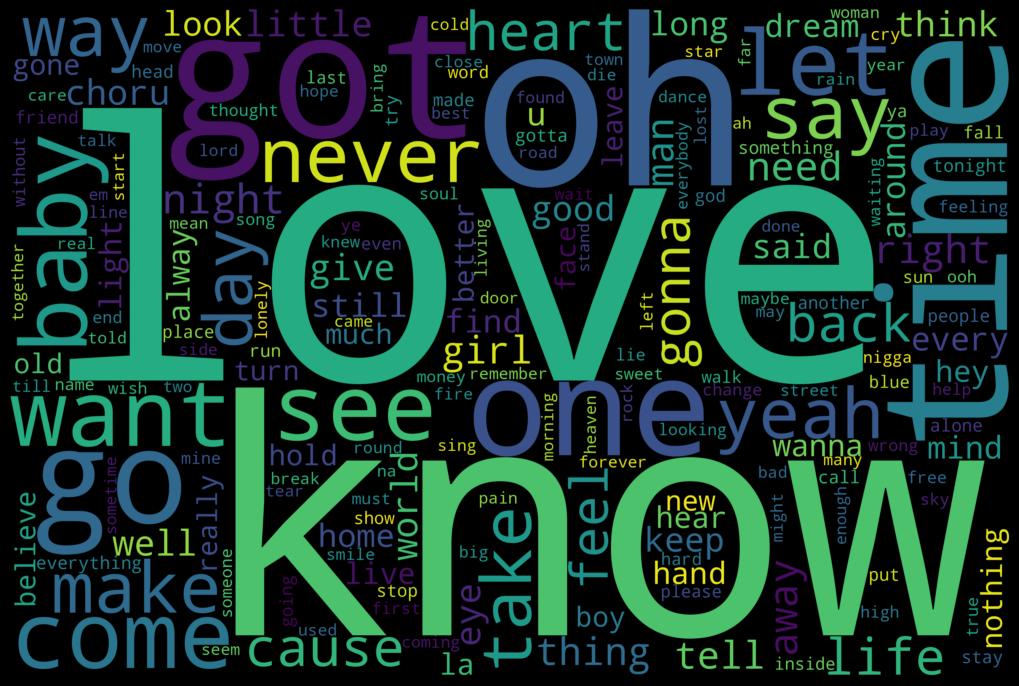

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = [" ".join(x) for x in list(letras_df.text)]

wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    collocations=False,  # Desactivar colocaciones
    colormap='viridis',  # Cambiar el colormap aquí
).generate(str(text))

fig = plt.figure(
    figsize=(10, 10),
    facecolor='k',
    edgecolor='k'
)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Para el caso de los datos de español, se observa con el wordcloud que las palabras que tienen mayor frecuencia son **amor, vida, corazón** y **universo**.

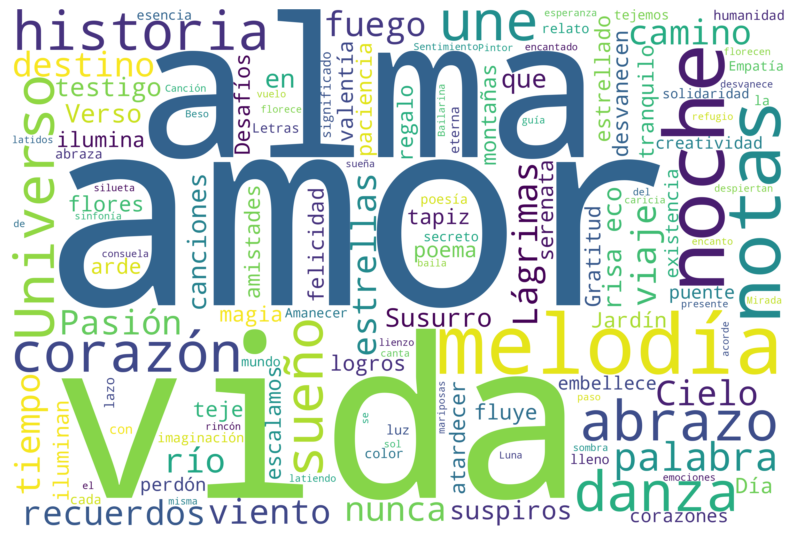

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tu texto
texto = [" ".join(x) for x in list(letras_esp_df.letra)]

# Configuración del WordCloud
wordcloud = WordCloud(width=3000, height=2000, background_color='white').generate(texto)

# Visualización del WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Contador de palabras

Aparte de la nube de palabras, podemos realizar un estudio de recuento de palabras más detallado.

Aquí vamos a contar las palabras más frecuentes que aparecieron en el contenido de las letras para que podamos hacernos una idea global del alcance y enfoque del conjunto de datos.

In [ ]:
from collections import Counter
text = [y  for x in list(letras_df.text) for y in x ]
count_words = Counter(text)

Obtenemos las 20 palabras más frecuentes de todo el texto y las representamos en un gráfico de barras. Aquí también podemos apreciar las palabras más utilizadas detectadas por la nube de palabras.

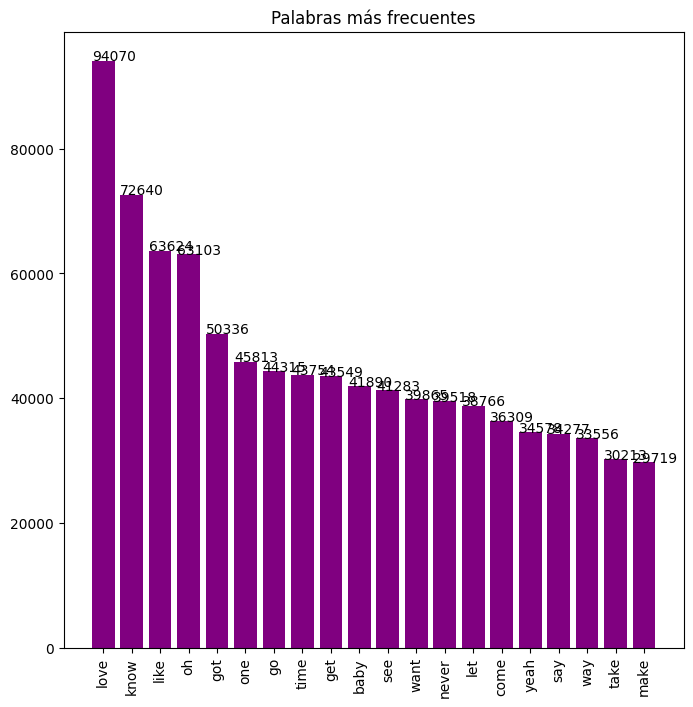

In [ ]:
most_popular_words = count_words.most_common()[:20]
words = [x[0] for x in most_popular_words]
count = [x[1] for x in most_popular_words]

plt.figure(figsize=(8,8))
bars=plt.bar(words, count, color = 'purple')
plt.xticks(rotation='vertical')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 30, yval) #rotation='vertical'
plt.title('Palabras más frecuentes')
plt.show()

Como vemos, la palabra que más se repite en las canciones es **love**, por una diferencia grande, sin embargo, **know** también está presente en 72640 ocasiones.

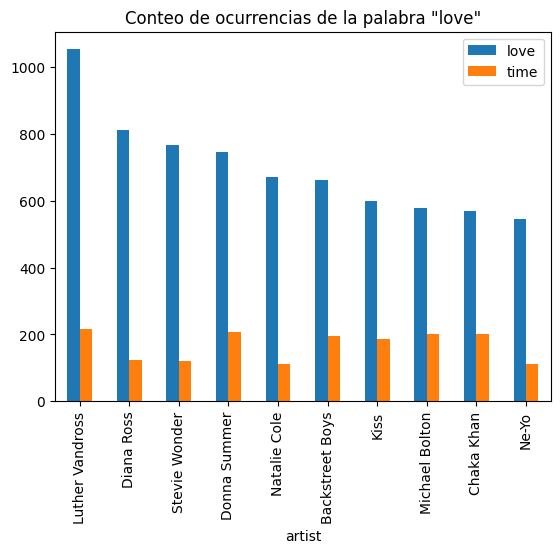

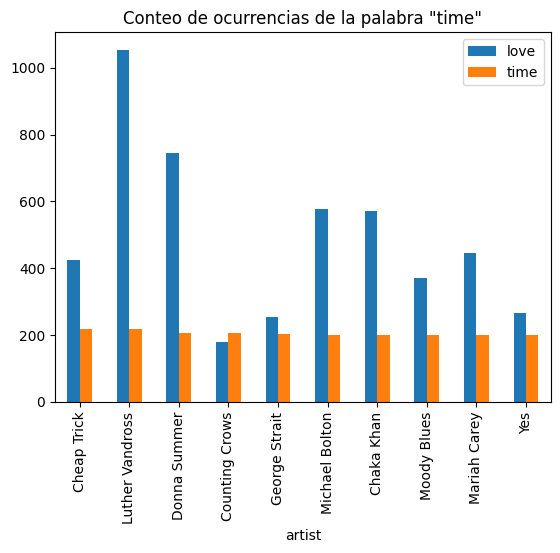

In [ ]:
size = letras_df.groupby(['artist']).agg('size') #número de letras por artistas

# Una columna que indica el recuento de estas palabras en el contenido.
letras_df['love']=letras_df.apply(lambda row : Counter(row['text'])['love'], axis=1)
letras_df['time']=letras_df.apply(lambda row : Counter(row['text'])['time'], axis=1)

# Sumamos el recuento de las palabras por artista
authors_love_time = letras_df.groupby(['artist']).agg(
    {
         'love':sum,    # get the count of love
         'time': sum  # get the count of time
    }
)

authors_love_time.sort_values(ascending=False, by='love').iloc[0:10].plot.bar()
plt.title('Conteo de ocurrencias de la palabra "love"')
authors_love_time.sort_values(ascending=False, by='time').iloc[0:10].plot.bar()
plt.title('Conteo de ocurrencias de la palabra "time"')
plt.show()

Parece que ciertos artistas han escrito muchas más canciones de amor que otros.

A continuación se muestran los cuadros en los que podemos ver respectivamente las gráficas ordenadas por el conteo de *love* y *time*. Notemos que la mayoría de los artistas que usan *love*, también usan el tiempo como letra importante.

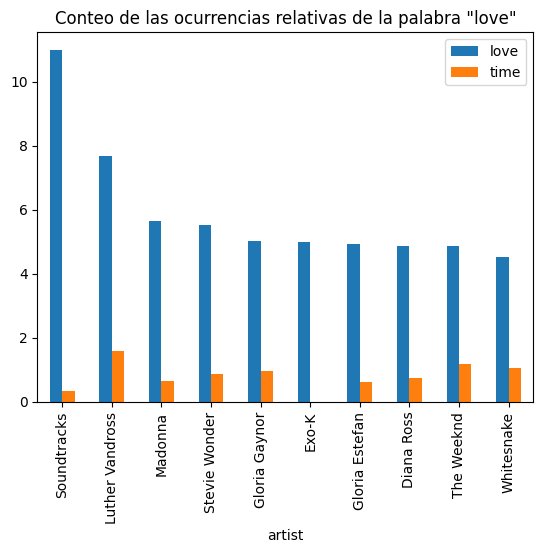

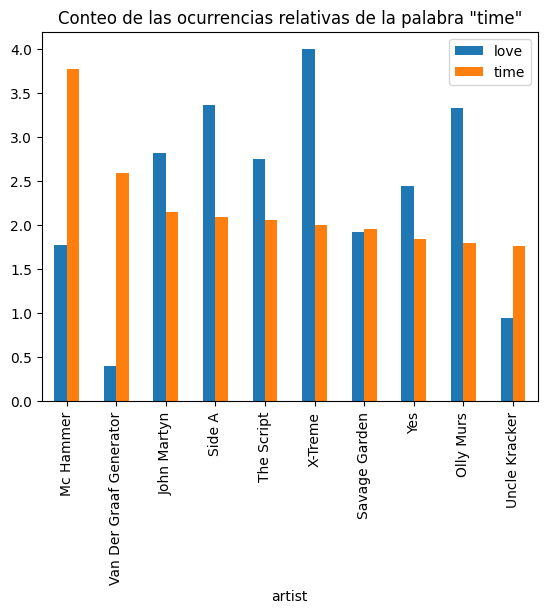

In [ ]:
authors_love_time['love'] = authors_love_time['love']/size
authors_love_time['time'] = authors_love_time['time']/size
authors_love_time.sort_values(ascending=False, by='love').iloc[0:10].plot.bar()
plt.title('Conteo de las ocurrencias relativas de la palabra "love"')
authors_love_time.sort_values(ascending=False, by='time').iloc[0:10].plot.bar()
plt.title('Conteo de las ocurrencias relativas de la palabra "time"')
plt.show()

# Comentarios finales

Gracias al análisis exploratorio de los datos desarrollado en este notebook, entendemos mejor el contenido de nuestra base de datos.

Con esta hoja, ahora tenemos una visión general de todo lo incluido en el conjunto de datos: tipo de datos, columnas, alcance, enfoque, etc.
